# Second part of the assignment

## *Comparing and contrasting Cao figures using Pandas*



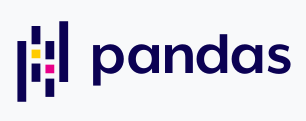


## Preliminaries:

In [1]:
import math #importing math
import matplotlib.pyplot as plt  #importing the matplotlib package
import numpy as np #importing numpy library
import pandas as pd #importing pandas library
import requests as rq #dealing with http requests
import re #importing the regular expression package
import datetime as dt #importing dates and times
import sklearn.neighbors as nei #predictive library (K-neighbour)
import seaborn as sns 
import urllib.request as urlrq #helping to import data

<br>

# Introduction


***

In this Jupyter Notebook, I will discuss the Pandas package for Python and its basic uses. I will then examine the data from the official Cao website for last year, 2020 and 2019. From there, I will merge the data into one and compare the data points against each other. I will hope to display these in some of pythons graphs.

The notebook itself is broken down into a few different parts relating to the specific tasks outlined in the official assignment. A corresponding synopsis will be found in the README.

<br>

# The Pandas package 


***

Pandas was developed in 2008 and it was freely assessable to the public in 2019. It was first introduced by Wes McKinney and was built upon Numpy and is brilliant for data manipulation, analysis and cleaning your data. Some uses are slicing, merging and joining dataset, concatenating, indexing, column header overriding and data munging. Two ways of analysing data by way of a Series and by Dataframe. It has gained notoriety in the past few years because its not hard to learn and the documentation can be easily understood. Pandas is quite quick in its execution and works well with other libraries such as matplotlib and numpy.

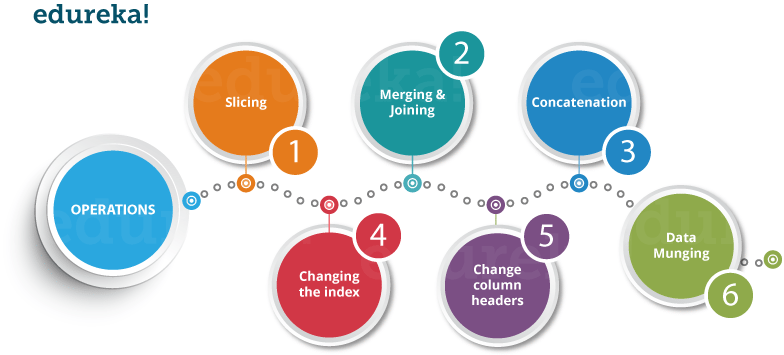

# Cao Points 2021

<br>

***

In [2]:
#cao_2021 = pd.read_excel('http://www2.cao.ie/points/l8.php') #Link for Cao points 2021

In [3]:
req = rq.get('http://www2.cao.ie/points/l8.php')

In [4]:
req #calling the req, 200 is considered as everything worked. 404 broken

<Response [200]>

In [5]:
#req.text #to view what has been imported from the html *taking up so much room so # out for awhile. 

In [6]:
#Taking this out for awhile

# for line in req.iter_lines(): #asking to iliterate through each line of the data set
    #print (line) #view

In [7]:
now = dt.datetime.now() #calling todays date and time Timestamp
print(now)

nowstring = now.strftime('%Y%m%d_%H%M%S') #formating as a string

2022-01-09 21:40:28.911447


In [8]:
path = 'data/cao2021_'+ nowstring + '.html' #creating a new path for original, so that we always have a copy of the original.

In [9]:
req.encoding #checking which encoding was used

'iso-8859-1'

In [10]:
original_encoding = req.encoding #as the server used the wrong encoding a new variable was created, original.

In [11]:
req.encoding = 'cp1252' #changing the encoding to cp1252

In [12]:
with open (path, 'w') as f:
    f.write(req.text)

In [13]:
re_course =re.compile(r'([A-Z]{2}[0-9]{3})(.*)([0-9]{3})(\*?) *') #compile regular expressions for matching lines

In [14]:
path = 'data/cao2021_csv'+ nowstring + '.csv' 

no_of_lines = 0

with open(path, 'w') as f:
    for line in req.iter_lines():
        dline = line.decode ('cp1252')
        if re_course.fullmatch(dline):
            no_of_lines = no_of_lines +1
            #csv_version = re_course.sub(r'\1,\2,\3,\4', dline)
            linesplit =re.split(' +' , dline)
            # print(','.join(linesplit))
            f.write(','.join(linesplit) +'\n')
            
            
    
print(f"Total number of lines produced: ", no_of_lines)


Total number of lines produced:  922


In [15]:
#df = pd.read_csv("http://www2.cao.ie/points/l8.php")

# Do checks to compare the 922 courses to what we have.

- I was able to locate a spreedsheet copy and chrome gave me the ability to download the Data into excel. In the real world, I would probably have saved the excel file and worked with that.

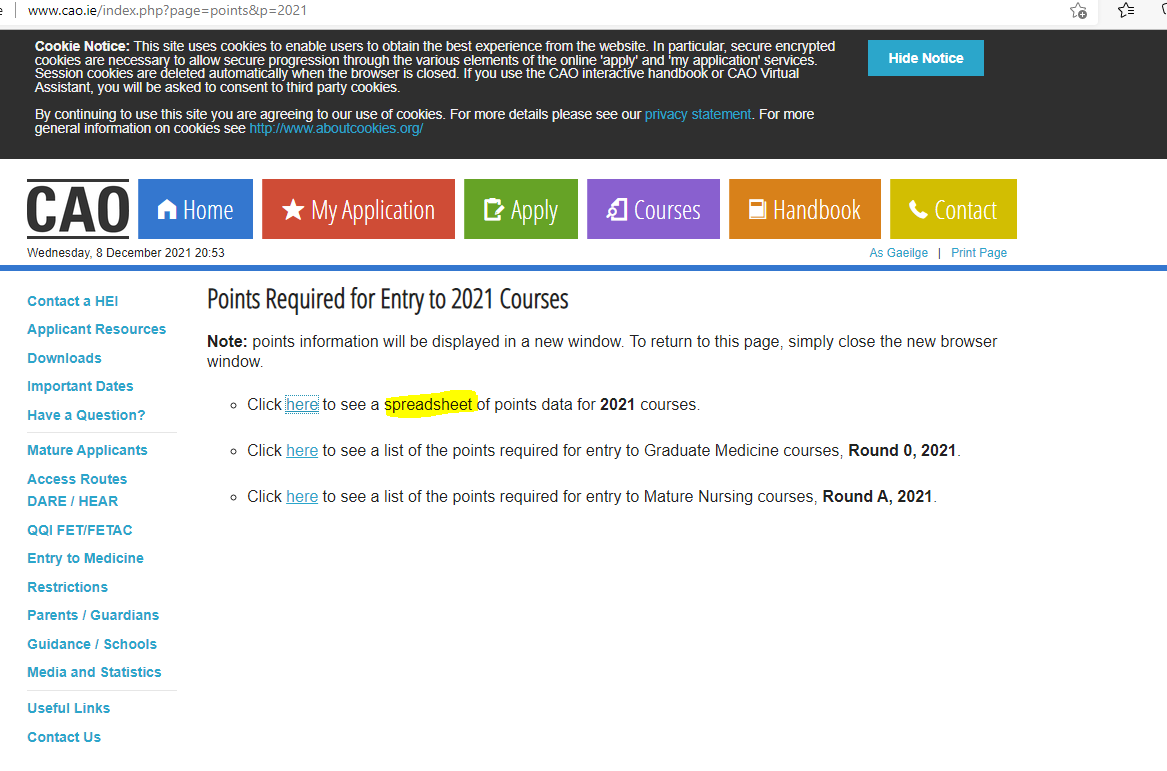

- So I quickly did a distict count on the level 8 course which produced 1034 courses. Therefore the numbers arent matching!

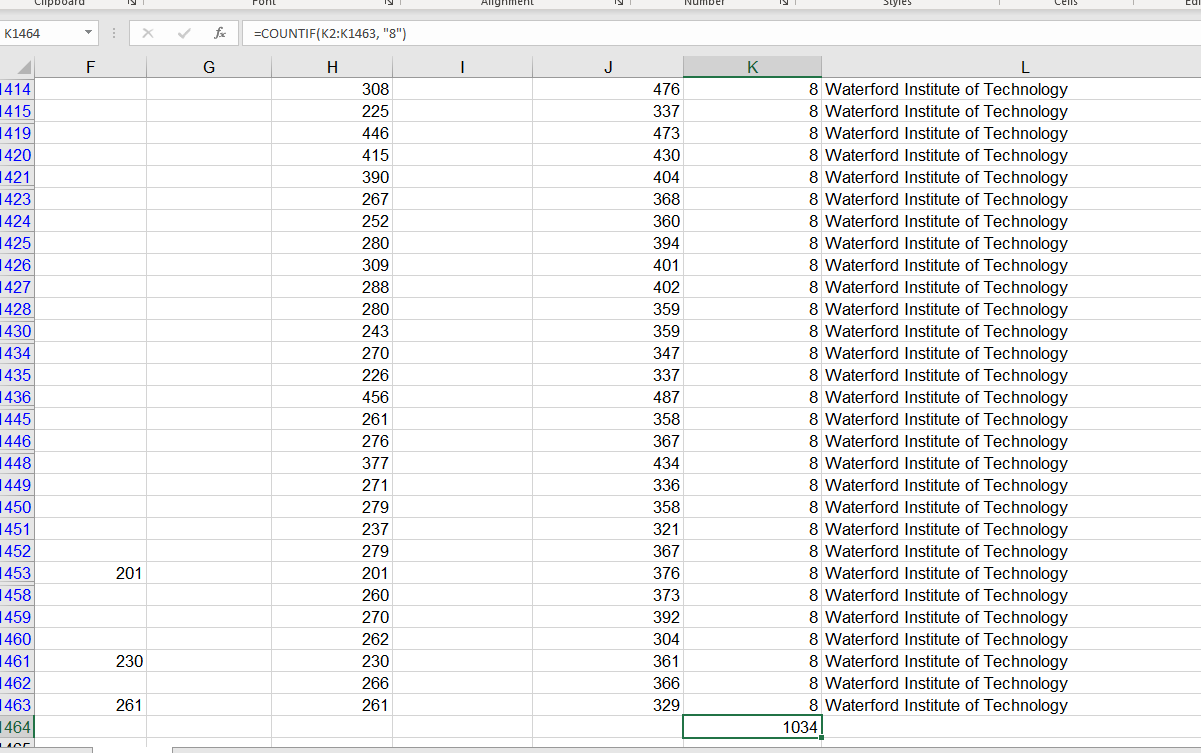



<br>

### So after leaving the assignment for a few days, I noticed that the CAO had updated their 2021 CAO points webpage and now you had the ability to use the data as an excel file.

***

In [16]:
path = 'data/cao2021_' + nowstring +' .xlsx' #creating a path for original excel sheet

In [17]:
urlrq.urlretrieve("http://www2.cao.ie/points/CAOPointsCharts2021.xlsx", path)  #fetching the data from the url

('data/cao2021_20220109_214028 .xlsx',
 <http.client.HTTPMessage at 0x2744b3c3c40>)

In [18]:
df2021= pd.read_excel("http://www2.cao.ie/points/CAOPointsCharts2021.xlsx",  skiprows =11) #creating the data frame, skipping the first few lines.

print(df2021.head()) #checkign the first few lines

         CATEGORY (ISCED Description)                     Course Title  \
0  Engineering and engineering trades  Music and Instrument Technology   
1                              Health              Pharmacy Technician   
2                              Health                   Dental Nursing   
3     Biological and related sciences                  Applied Science   
4         Business and administration                         Business   

  Course Code R1 Points R1 Random R2 Points  R2 Random EOS Points EOS Random  \
0       AL605       211       NaN        NaN       NaN        211        NaN   
1       AL630       308       NaN        NaN       NaN        308        NaN   
2       AL631       311       NaN        NaN       NaN        311        NaN   
3       AL632       297       NaN        NaN       NaN        297        NaN   
4       AL650       AQA       NaN        AQA       NaN        AQA        NaN   

  EOS Midpoints  Course Level                              HEI Test/Interv

In [19]:
df2021.head() #Checking the first few lines

,CATEGORY (ISCED Description),Course Title,Course Code,R1 Points,R1 Random,R2 Points,R2 Random,EOS Points,EOS Random,EOS Midpoints,Course Level,HEI,Test/Interview,AVP,v
0,Engineering and engineering trades,Music and Instrument Technology,AL605,211,NaN,NaN,NaN,211,NaN,319,6,Athlone Institute of Technology,NaN,NaN,NaN
1,Health,Pharmacy Technician,AL630,308,NaN,NaN,NaN,308,NaN,409,6,Athlone Institute of Technology,NaN,NaN,NaN
2,Health,Dental Nursing,AL631,311,NaN,NaN,NaN,311,NaN,400,6,Athlone Institute of Technology,NaN,NaN,NaN
3,Biological and related sciences,Applied Science,AL632,297,NaN,NaN,NaN,297,NaN,454,6,Athlone Institute of Technology,NaN,NaN,NaN
4,Business and administration,Business,AL650,AQA,NaN,AQA,NaN,AQA,NaN,351,6,Athlone Institute of Technology,NaN,avp,NaN


In [20]:
df2021 = df2021.drop(df2021.columns[[0,4,6,7,8,12,13,14]], axis=1) #removing the first column, last, column AVP, column Test, column R1 Random,column R2 Random, EOS Points, Ros Random. 

In [21]:
df2021 #checking the df again to see if the right columns were correctly removed.

,Course Title,Course Code,R1 Points,R2 Points,EOS Midpoints,Course Level,HEI
0,Music and Instrument Technology,AL605,211,NaN,319,6,Athlone Institute of Technology
1,Pharmacy Technician,AL630,308,NaN,409,6,Athlone Institute of Technology
2,Dental Nursing,AL631,311,NaN,400,6,Athlone Institute of Technology
3,Applied Science,AL632,297,NaN,454,6,Athlone Institute of Technology
4,Business,AL650,AQA,AQA,351,6,Athlone Institute of Technology
...,...,...,...,...,...,...,...
1446,Creative Computing,WD211,270,NaN,392,8,Waterford Institute of Technology
1447,Recreation and Sport Management,WD212,262,NaN,304,8,Waterford Institute of Technology
1448,Mechanical and Manufacturing Engineering,WD230,230,230,361,8,Waterford Institute of Technology
1449,Early Childhood Care and Education,WD231,266,NaN,366,8,Waterford Institute of Technology


In [22]:
df2021.iloc[-5] #random checks to compare against the excel sheet, which is correct

Course Title                    Creative Computing
Course Code                                  WD211
R1 Points                                      270
R2 Points                                      NaN
EOS Midpoints                                  392
Course Level                                     8
HEI              Waterford Institute of Technology
Name: 1446, dtype: object

<br>

### Comparing to the 2021 excel sheet: *5 places from the bottom* 

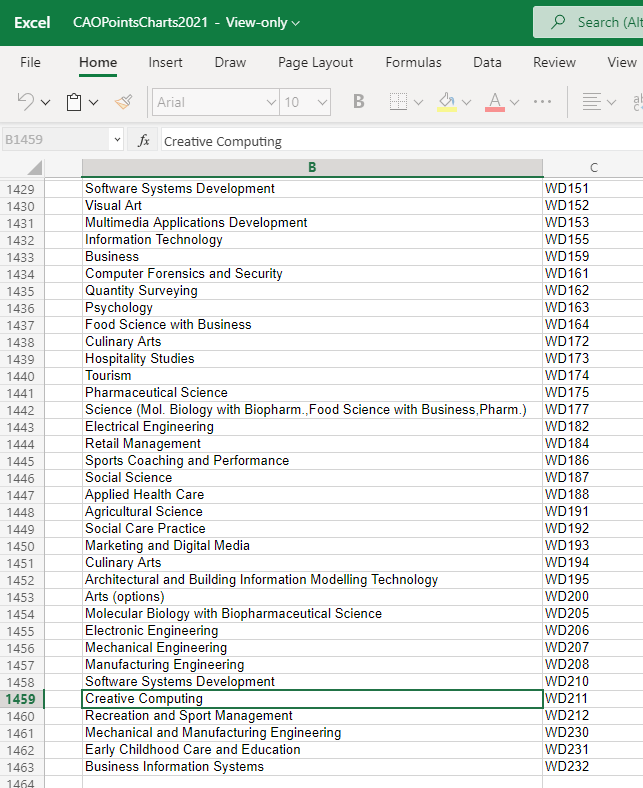 

<br>

In [23]:
df2021.iloc[100] #another check the other way.

Course Title                   Civil Engineering
Course Code                                CW478
R1 Points                                    465
R2 Points                                    NaN
EOS Midpoints                                465
Course Level                                   8
HEI              Institute of Technology, Carlow
Name: 100, dtype: object

<br>

### Comparing to the file again, *minus the first 10ish lines that we ignored while importing the file, plus the header this would be around the 113th line.

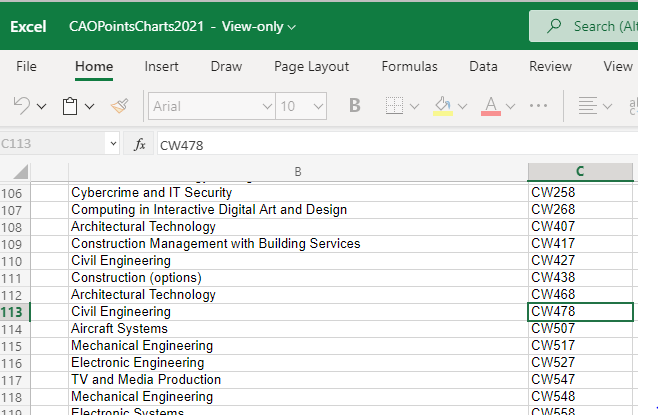

<br>

In [24]:
path = 'data/cao2021_' + nowstring + 'edited'+ ' .csv' #created a new path of the new 2021 Cao points dataset

In [25]:
df2021.to_csv(path)  #forced it into memory

<br>

### Steps completed on the Cao points 2021:

***

1.	After realising that the cao points for 2021, could be read in as an excel file I use this method as it seemed the most efficient way to display the 2021 data.
2.	I ensured the first few lines of the file would be ignored that included the preamble.
3.	I called a view of the newly formed data frame, to ensure everything was imported correctly.
4.	I removed all the columns that were deemed irrelevant and try to keep consistency across three dataframes (2021, 2020, 2019) I would end up using to do my analysis.
5.	 I carried out a few checks by looking at the data in notepad++ to see if they was anything missing or was out of the ordinary.
6.	Once placed and named as my *df2021*, I did some extra checks on the df by checking the 5th place from the bottom and the 100th place downwards from the top. These both gave the exact courses so I was confident in my data for 2021. 

<br>

# Cao Points 2020

<br>

***

In [26]:
path = 'data/cao2020_' + nowstring +' .xlsx' #creating a path for original excel sheet

In [27]:
urlrq.urlretrieve("http://www2.cao.ie/points/CAOPointsCharts2020.xlsx", path) 

('data/cao2020_20220109_214028 .xlsx',
 <http.client.HTTPMessage at 0x2744b3be040>)

In [28]:
df2020= pd.read_excel("http://www2.cao.ie/points/CAOPointsCharts2020.xlsx", skiprows =10) #creating the data frame

print(df2020.head(3))

  CATEGORY (i.e.ISCED description)  \
0      Business and administration   
1    Humanities (except languages)   
2                             Arts   

                                       COURSE TITLE COURSE CODE2 R1 POINTS  \
0                            International Business        AC120       209   
1                                      Liberal Arts        AC137       252   
2  First Year Art & Design (Common Entry,portfolio)        AD101  #+matric   

  R1 Random * R2 POINTS R2 Random*       EOS EOS Random * EOS Mid-point  ...  \
0         NaN       NaN        NaN       209          NaN           280  ...   
1         NaN       NaN        NaN       252          NaN           270  ...   
2         NaN       NaN        NaN  #+matric          NaN      #+matric  ...   

   avp    v Column1 Column2 Column3  Column4  Column5  Column6  Column7  \
0  NaN  NaN     NaN     NaN     NaN      NaN      NaN      NaN      NaN   
1  NaN  NaN     NaN     NaN     NaN      NaN      NaN      NaN 

In [29]:
df2020 #looking holistical at the dateframe

,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,...,avp,v,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,Business and administration,International Business,AC120,209,NaN,NaN,NaN,209,NaN,280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Humanities (except languages),Liberal Arts,AC137,252,NaN,NaN,NaN,252,NaN,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arts,"First Year Art & Design (Common Entry,portfolio)",AD101,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arts,Graphic Design and Moving Image Design (portfo...,AD102,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arts,Textile & Surface Design and Jewellery & Objec...,AD103,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,Manufacturing and processing,Manufacturing Engineering,WD208,188,NaN,NaN,NaN,188,NaN,339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,Information and Communication Technologies (ICTs),Software Systems Development,WD210,279,NaN,NaN,NaN,279,NaN,337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,Information and Communication Technologies (ICTs),Creative Computing,WD211,271,NaN,NaN,NaN,271,NaN,318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1462,Personal services,Recreation and Sport Management,WD212,270,NaN,NaN,NaN,270,NaN,349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df2020 = df2020.drop(df2020.columns[[0,4,6,7,8,12,13,14,15,16,17,18,19,20,21,22]], axis=1) #removing the unnecessary columns

In [31]:
df2020.describe() #getting another look at the df

,LEVEL
count,1464.000000
mean,7.639344
std,0.595939
min,6.000000
25%,7.000000
50%,8.000000
75%,8.000000
max,8.000000


In [32]:
df2020.iloc[-2] #checking that the data was pulled incorrectly.

COURSE TITLE       Recreation and Sport Management
COURSE CODE2                                 WD212
R1 POINTS                                      270
R2 POINTS                                      NaN
EOS Mid-point                                  349
LEVEL                                            8
HEI              Waterford Institute of Technology
Name: 1462, dtype: object

In [33]:
df2020.iloc[73] #further checkes. 

COURSE TITLE     Education, Home Economics and Biology - with c...
COURSE CODE2                                                 AS001
R1 POINTS                                                      510
R2 POINTS                                                      NaN
EOS Mid-point                                                  544
LEVEL                                                            8
HEI                                           St. Angela`s College
Name: 73, dtype: object

In [34]:
path = 'data/cao2020_' + nowstring +' .csv' #creating new path for the new pandas df

In [35]:
df2020.to_csv(path) #save pandas df to disk

<br>

### Steps completed on the Cao points 2020:

***
1. Most of the steps carried out were similar to 2021 CAO data setup.
2. Alot more unecessary columns were removed from the dataset compared to the 2021 points.
3. Further checks were done on the course names and points. 

<br>

<br>

# Cao Points 2019


***

###### Steps to convert PDF to a readable file

1. Download original pdf file and saved it as a pdf
2. Opened the pdf file with word and saved it as a .docx
3. Saved a third copy and called it the edited version, this will allow me to edit the docx with altering the original. 
4. Deleted all headers and footers of the word doc.
5. Further deletion of the preamble
6. Copied data into notepad++
7. Delete all the college header names, this left blank lines.
8. Delete all blank lines ~ Edit -> Line Operations -> Remove Empty Lines
9. Ensure the delimiter is added (sep ='\t') for the file to be read in.
10. Replace double tab spaces with Find and replace and input single tab spaces *5 found
11. Removed blank spaces at the end of line 178 and at 266.
12. Find and Replace '#' and '*' with blank.
13. Save the file.


In [36]:
df2019 =pd.read_csv('data/cao2019_20211227_072908_edited.csv', sep='\t') #Link for the Cao points 2019

In [37]:
df2019 #the df itself

,Course Code,COURSE,EOS,Mid
0,AL801,Software Design with Virtual Reality and Gaming,304,328.0
1,AL802,Software Design with Cloud Computing,301,306.0
2,AL803,Software Design with Mobile Apps and Connected...,309,337.0
3,AL805,Network Management and Cloud Infrastructure,329,442.0
4,AL810,Quantity Surveying,307,349.0
...,...,...,...,...
925,WD200,Arts (options),221,296.0
926,WD210,Software Systems Development,271,329.0
927,WD211,Creative Computing,275,322.0
928,WD212,Recreation and Sport Management,274,311.0


<br>

# Compairing the datasets


***

In [38]:
df2021

,Course Title,Course Code,R1 Points,R2 Points,EOS Midpoints,Course Level,HEI
0,Music and Instrument Technology,AL605,211,NaN,319,6,Athlone Institute of Technology
1,Pharmacy Technician,AL630,308,NaN,409,6,Athlone Institute of Technology
2,Dental Nursing,AL631,311,NaN,400,6,Athlone Institute of Technology
3,Applied Science,AL632,297,NaN,454,6,Athlone Institute of Technology
4,Business,AL650,AQA,AQA,351,6,Athlone Institute of Technology
...,...,...,...,...,...,...,...
1446,Creative Computing,WD211,270,NaN,392,8,Waterford Institute of Technology
1447,Recreation and Sport Management,WD212,262,NaN,304,8,Waterford Institute of Technology
1448,Mechanical and Manufacturing Engineering,WD230,230,230,361,8,Waterford Institute of Technology
1449,Early Childhood Care and Education,WD231,266,NaN,366,8,Waterford Institute of Technology


In [39]:
df2020

,COURSE TITLE,COURSE CODE2,R1 POINTS,R2 POINTS,EOS Mid-point,LEVEL,HEI
0,International Business,AC120,209,NaN,280,8,American College
1,Liberal Arts,AC137,252,NaN,270,8,American College
2,"First Year Art & Design (Common Entry,portfolio)",AD101,#+matric,NaN,#+matric,8,National College of Art and Design
3,Graphic Design and Moving Image Design (portfo...,AD102,#+matric,NaN,#+matric,8,National College of Art and Design
4,Textile & Surface Design and Jewellery & Objec...,AD103,#+matric,NaN,#+matric,8,National College of Art and Design
...,...,...,...,...,...,...,...
1459,Manufacturing Engineering,WD208,188,NaN,339,7,Waterford Institute of Technology
1460,Software Systems Development,WD210,279,NaN,337,8,Waterford Institute of Technology
1461,Creative Computing,WD211,271,NaN,318,8,Waterford Institute of Technology
1462,Recreation and Sport Management,WD212,270,NaN,349,8,Waterford Institute of Technology


In [40]:
df2019

,Course Code,COURSE,EOS,Mid
0,AL801,Software Design with Virtual Reality and Gaming,304,328.0
1,AL802,Software Design with Cloud Computing,301,306.0
2,AL803,Software Design with Mobile Apps and Connected...,309,337.0
3,AL805,Network Management and Cloud Infrastructure,329,442.0
4,AL810,Quantity Surveying,307,349.0
...,...,...,...,...
925,WD200,Arts (options),221,296.0
926,WD210,Software Systems Development,271,329.0
927,WD211,Creative Computing,275,322.0
928,WD212,Recreation and Sport Management,274,311.0


In [41]:
df2019['Course Code'].isin(df2020['COURSE CODE2']).value_counts() #Checking how many courses in 2019 is the same as 2020

True     791
False    139
Name: Course Code, dtype: int64

In [42]:
df2019['Course Code'].isin(df2021['Course Code']).value_counts() #Checking how many courses in 2019 is the same as 2021

True     756
False    174
Name: Course Code, dtype: int64

In [43]:
df2021['Course Code'].isin(df2020['COURSE CODE2']).value_counts() #also comparing 2021 V 2020

True     1357
False      94
Name: Course Code, dtype: int64

<br>

# Merging of the dataframes


***

In [44]:
Courses2021 =df2021[['Course Code', 'Course Title']] #creating a new 2021 df with only two columms
Courses2021 #calling the newly created df

,Course Code,Course Title
0,AL605,Music and Instrument Technology
1,AL630,Pharmacy Technician
2,AL631,Dental Nursing
3,AL632,Applied Science
4,AL650,Business
...,...,...
1446,WD211,Creative Computing
1447,WD212,Recreation and Sport Management
1448,WD230,Mechanical and Manufacturing Engineering
1449,WD231,Early Childhood Care and Education


In [45]:
Courses2020 =df2020[['COURSE CODE2', 'COURSE TITLE']] #creating a new 2020 df with only two columms
Courses2020.columns = ['Course Code', 'Course Title'] #renaming the columns which will help merge the dfs
Courses2020

,Course Code,Course Title
0,AC120,International Business
1,AC137,Liberal Arts
2,AD101,"First Year Art & Design (Common Entry,portfolio)"
3,AD102,Graphic Design and Moving Image Design (portfo...
4,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
1459,WD208,Manufacturing Engineering
1460,WD210,Software Systems Development
1461,WD211,Creative Computing
1462,WD212,Recreation and Sport Management


In [46]:
Courses2019 =df2019[['Course Code', 'COURSE']] #creating a new 2019 df with only two columms
Courses2019.columns = ['Course Code', 'Course Title'] #renaming the columns which will help merge the dfs
Courses2019

,Course Code,Course Title
0,AL801,Software Design with Virtual Reality and Gaming
1,AL802,Software Design with Cloud Computing
2,AL803,Software Design with Mobile Apps and Connected...
3,AL805,Network Management and Cloud Infrastructure
4,AL810,Quantity Surveying
...,...,...
925,WD200,Arts (options)
926,WD210,Software Systems Development
927,WD211,Creative Computing
928,WD212,Recreation and Sport Management


In [47]:
allcourses = pd.concat([ Courses2020,Courses2021, Courses2019], ignore_index=True) #concatating both df together
allcourses

,Course Code,Course Title
0,AC120,International Business
1,AC137,Liberal Arts
2,AD101,"First Year Art & Design (Common Entry,portfolio)"
3,AD102,Graphic Design and Moving Image Design (portfo...
4,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
3840,WD200,Arts (options)
3841,WD210,Software Systems Development
3842,WD211,Creative Computing
3843,WD212,Recreation and Sport Management


In [48]:
allcourses.sort_values('Course Code') #looking at the duplicated values bY Course Code

,Course Code,Course Title
0,AC120,International Business
3083,AC120,International Business
1737,AC120,International Business
1,AC137,Liberal Arts
3084,AC137,Liberal Arts
...,...,...
2912,WD230,Mechanical and Manufacturing Engineering
1463,WD230,Mechanical and Manufacturing Engineering
3844,WD230,Mechanical and Manufacturing Engineering
2913,WD231,Early Childhood Care and Education


In [49]:
allcourses.iloc[0] #checking the dupes AC120

Course Code                      AC120
Course Title    International Business
Name: 0, dtype: object

In [50]:
allcourses.iloc[3083] 

Course Code                      AC120
Course Title    International Business
Name: 3083, dtype: object

In [51]:
allcourses.iloc[1737] #checking the dupes AC120

Course Code                      AC120
Course Title    International Business
Name: 1737, dtype: object

In [52]:
allcourses[allcourses.duplicated()] #looking at our duplicate records

,Course Code,Course Title
1464,AL605,Music and Instrument Technology
1465,AL630,Pharmacy Technician
1466,AL631,Dental Nursing
1467,AL632,Applied Science
1468,AL650,Business
...,...,...
3840,WD200,Arts (options)
3841,WD210,Software Systems Development
3842,WD211,Creative Computing
3843,WD212,Recreation and Sport Management


In [53]:
allcourses.drop_duplicates() #New clean df with all dupes dropped

,Course Code,Course Title
0,AC120,International Business
1,AC137,Liberal Arts
2,AD101,"First Year Art & Design (Common Entry,portfolio)"
3,AD102,Graphic Design and Moving Image Design (portfo...
4,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
3783,TL801,Animation Visual Effects and Motion Design
3784,TL802,"TV, Radio and New Media"
3785,TL803,Music Technology
3788,TL812,Computing with Digital Media


In [54]:
allcourses.drop_duplicates(subset=['Course Code'], inplace=True) #Dropped the duplicated based on Course code only.

In [55]:
allcourses #calling the main dataframe

,Course Code,Course Title
0,AC120,International Business
1,AC137,Liberal Arts
2,AD101,"First Year Art & Design (Common Entry,portfolio)"
3,AD102,Graphic Design and Moving Image Design (portfo...
4,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
3774,SG441,Environmental Science
3779,SG446,Applied Archaeology
3785,TL803,Music Technology
3788,TL812,Computing with Digital Media


In [56]:
df2019.columns=['Course Code', 'Course Title', 'R1 Points 2019','R2 Points 2019'] #Renaming the column headers for 2019 to make life simpler later on

In [57]:
df2019 #ensuring it was completed

,Course Code,Course Title,R1 Points 2019,R2 Points 2019
0,AL801,Software Design with Virtual Reality and Gaming,304,328.0
1,AL802,Software Design with Cloud Computing,301,306.0
2,AL803,Software Design with Mobile Apps and Connected...,309,337.0
3,AL805,Network Management and Cloud Infrastructure,329,442.0
4,AL810,Quantity Surveying,307,349.0
...,...,...,...,...
925,WD200,Arts (options),221,296.0
926,WD210,Software Systems Development,271,329.0
927,WD211,Creative Computing,275,322.0
928,WD212,Recreation and Sport Management,274,311.0


In [58]:
allcourses #displaying the data

,Course Code,Course Title
0,AC120,International Business
1,AC137,Liberal Arts
2,AD101,"First Year Art & Design (Common Entry,portfolio)"
3,AD102,Graphic Design and Moving Image Design (portfo...
4,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
3774,SG441,Environmental Science
3779,SG446,Applied Archaeology
3785,TL803,Music Technology
3788,TL812,Computing with Digital Media


In [59]:
allcourses.sort_values('Course Code') #looking at the duplicated values bY Course Code

,Course Code,Course Title
0,AC120,International Business
1,AC137,Liberal Arts
2,AD101,"First Year Art & Design (Common Entry,portfolio)"
3,AD102,Graphic Design and Moving Image Design (portfo...
4,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
1461,WD211,Creative Computing
1462,WD212,Recreation and Sport Management
1463,WD230,Mechanical and Manufacturing Engineering
2913,WD231,Early Childhood Care and Education


In [60]:
allcourses[allcourses.duplicated(keep=False)] #ensuring no duplicates where left as this was an ongoing issue for me

,Course Code,Course Title


In [61]:
allcourses #all values for 2021,2020,2019

,Course Code,Course Title
0,AC120,International Business
1,AC137,Liberal Arts
2,AD101,"First Year Art & Design (Common Entry,portfolio)"
3,AD102,Graphic Design and Moving Image Design (portfo...
4,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
3774,SG441,Environmental Science
3779,SG446,Applied Archaeology
3785,TL803,Music Technology
3788,TL812,Computing with Digital Media


<br>

# Adding our Round 1 Points

***

In [62]:
allcourses.set_index('Course Code', inplace=True) #Making the Course code as our Index values

In [63]:
allcourses #ensuring the index was completed

,Course Title
Course Code,
AC120,International Business
AC137,Liberal Arts
AD101,"First Year Art & Design (Common Entry,portfolio)"
AD102,Graphic Design and Moving Image Design (portfo...
AD103,Textile & Surface Design and Jewellery & Objec...
...,...
SG441,Environmental Science
SG446,Applied Archaeology
TL803,Music Technology


In [64]:
df2021_r1= df2021[['Course Code','Course Title' ,'R1 Points']] #creating a df with the course code and R1 points so we can join the course code with the index and add the R1 points for 2021 
df2021_r1.columns =['Course Code', 'Title','R1 Points 2021']

In [65]:
df2021_r1.set_index('Course Code', inplace=True) #enduring the course code is the index 

In [66]:
allcourses = allcourses.join(df2021_r1[['R1 Points 2021']]) #Join the main dataset with the R1 Points for 2021

In [67]:
allcourses.sort_values('Course Code') #sort by course code

,Course Title,R1 Points 2021
Course Code,,
AC120,International Business,294
AC137,Liberal Arts,271
AD101,"First Year Art & Design (Common Entry,portfolio)",554
AD102,Graphic Design and Moving Image Design (portfo...,538
AD103,Textile & Surface Design and Jewellery & Objec...,505
...,...,...
WD211,Creative Computing,270
WD212,Recreation and Sport Management,262
WD230,Mechanical and Manufacturing Engineering,230


In [68]:
allcourses.loc[allcourses['Course Title'] == 'Applied Science'] #spot check

,Course Title,R1 Points 2021
Course Code,,
AL632,Applied Science,297


In [69]:
df2020_r1= df2020[['COURSE CODE2','COURSE TITLE' ,'R1 POINTS']] #creating a df with the course code and R1 points so we can join the course code with the index and add the R1 points for 2020 
df2020_r1.columns =['Course Code', 'Title','R1 Points 2020']

In [70]:
df2020_r1.set_index('Course Code', inplace=True) #enduring the course code is the index 

In [71]:
allcourses = allcourses.join(df2020_r1[['R1 Points 2020']]) #Join the main dataset with the R1 Points for 2020

In [72]:
allcourses.sort_values('Course Code') #sort by course code

,Course Title,R1 Points 2021,R1 Points 2020
Course Code,,,
AC120,International Business,294,209
AC137,Liberal Arts,271,252
AD101,"First Year Art & Design (Common Entry,portfolio)",554,#+matric
AD102,Graphic Design and Moving Image Design (portfo...,538,#+matric
AD103,Textile & Surface Design and Jewellery & Objec...,505,#+matric
...,...,...,...
WD211,Creative Computing,270,271
WD212,Recreation and Sport Management,262,270
WD230,Mechanical and Manufacturing Engineering,230,253


In [73]:
df2019_r1= df2019[['Course Code','Course Title' ,'R1 Points 2019']] #creating a df with the course code and R1 points so we can join the course code with the index and add the R1 points for 2021 
df2019_r1.set_index('Course Code', inplace=True) #enduring the course code is the index 

In [74]:
allcourses = allcourses.join(df2019_r1[['R1 Points 2019']]) #Join the main dataset with the R1 Points for 2019

In [75]:
allcourses.sort_values('Course Code') #sort by course code

,Course Title,R1 Points 2021,R1 Points 2020,R1 Points 2019
Course Code,,,,
AC120,International Business,294,209,234
AC137,Liberal Arts,271,252,252
AD101,"First Year Art & Design (Common Entry,portfolio)",554,#+matric,+mat
AD102,Graphic Design and Moving Image Design (portfo...,538,#+matric,+mat
AD103,Textile & Surface Design and Jewellery & Objec...,505,#+matric,+mat
...,...,...,...,...
WD211,Creative Computing,270,271,275
WD212,Recreation and Sport Management,262,270,274
WD230,Mechanical and Manufacturing Engineering,230,253,273


In [76]:
allcourses.loc[allcourses['Course Title'] == 'Applied Science'] #spot check

,Course Title,R1 Points 2021,R1 Points 2020,R1 Points 2019
Course Code,,,,
AL632,Applied Science,297,234,NaN


<br>

# Cleaning the data

***

In [77]:
allcourses.isnull().values.any() #checking if we have null values

True

In [78]:
allcourses.isnull().sum() #Counts of how many null values we have in the data set. 

Course Title        0
R1 Points 2021    276
R1 Points 2020    255
R1 Points 2019    777
dtype: int64

In [79]:
percent_missing = allcourses.isnull().sum() * 100 / len(allcourses) #checking on how much was missing

print('The percentage missing is:', percent_missing)

The percentage missing is: Course Title       0.000000
R1 Points 2021    16.312057
R1 Points 2020    15.070922
R1 Points 2019    45.921986
dtype: float64


In [80]:
allcourses.isnull().mean().round(4).mul(100).sort_values(ascending=False) #checking on how much was missing

R1 Points 2019    45.92
R1 Points 2021    16.31
R1 Points 2020    15.07
Course Title       0.00
dtype: float64

In [81]:
allcourses.info() #Checking the data types 

<class 'pandas.core.frame.DataFrame'>
Index: 1692 entries, AC120 to WD148
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Course Title    1692 non-null   object
 1   R1 Points 2021  1416 non-null   object
 2   R1 Points 2020  1437 non-null   object
 3   R1 Points 2019  915 non-null    object
dtypes: object(4)
memory usage: 130.6+ KB


In [82]:
allcourses.apply(pd.to_numeric, errors='ignore') #changing the data type to numberic

,Course Title,R1 Points 2021,R1 Points 2020,R1 Points 2019
Course Code,,,,
AC120,International Business,294,209,234
AC137,Liberal Arts,271,252,252
AD101,"First Year Art & Design (Common Entry,portfolio)",554,#+matric,+mat
AD102,Graphic Design and Moving Image Design (portfo...,538,#+matric,+mat
AD103,Textile & Surface Design and Jewellery & Objec...,505,#+matric,+mat
...,...,...,...,...
SG441,Environmental Science,NaN,NaN,297
SG446,Applied Archaeology,NaN,NaN,289
TL803,Music Technology,NaN,NaN,264


In [83]:
allcourses['R1 Points 2021'].tolist() #to view the data in R1 2021 in list view
%pprint #this turns of the vertical view off

Pretty printing has been turned OFF


In [84]:
allcourses = allcourses.fillna(0) #Replacing all the NaNa with 0 

In [85]:
allcourses = allcourses.replace('AQA', 0) #replace AQA character to 0

In [86]:
allcourses = allcourses.replace('#', 0 ) #replace # character to 0

In [87]:
allcourses = allcourses.replace('#498',498 ) #replace #498 character to 498

In [88]:
allcourses = allcourses.replace('#521',521 ) #replace #521 character to 521

In [89]:
allcourses = allcourses.replace('#473', 473) #replace #473 character to 473

In [90]:
allcourses = allcourses.replace('#498', 498) #replace #498 character to 498

In [91]:
allcourses = allcourses.replace('#543', 543) #replace #543 character to 443

In [92]:
allcourses = allcourses.replace('#531', 531) #replace #700 character to 700

In [93]:
allcourses = allcourses.replace('#700', 700) #replace #700 character to 700

In [94]:
#allcourses['R1 Points 2020'] = allcourses['R1 Points 2020'].str.replace('#','')

In [95]:
allcourses = allcourses.replace('#','')

In [96]:
allcourses = allcourses.replace('#+matric', 0) #replace #+matric character to 0

In [97]:
allcourses = allcourses.replace('+matric', 0) #replace #+matric character to 0

In [98]:
allcourses = allcourses.replace(' +mat', 0) #replace +mat character to 0

In [99]:
allcourses['R1 Points 2019'] = allcourses['R1 Points 2019'].astype('int64') 

In [100]:
allcourses['R1 Points 2021'] = allcourses['R1 Points 2021'].astype('int64') 

In [101]:
allcourses = allcourses.fillna(0) #Replacing all the NaNa with 0 


In [102]:
allcourses['R1 Points 2020'] = allcourses['R1 Points 2020'].astype('int64') 

In [103]:
allcourses['R1 Points 2021'].tolist() #Firstly the tolist was printing vertically

[294, 271, 554, 538, 505, 591, 514, 760, 413, 337, 738, 444, 0, 0, 0, 0, 211, 308, 311, 297, 0, 0, 0, 0, 207, 220, 211, 210, 250, 243, 238, 247, 226, 242, 242, 261, 421, 244, 251, 241, 223, 0, 642, 260, 300, 300, 313, 350, 321, 328, 0, 327, 451, 440, 346, 357, 324, 325, 346, 477, 338, 306, 309, 302, 336, 300, 309, 304, 301, 575, 747, 306, 484, 542, 464, 463, 378, 440, 440, 387, 0, 0, 0, 292, 290, 325, 300, 434, 339, 421, 312, 440, 367, 488, 409, 371, 464, 0, 0, 347, 544, 499, 399, 308, 473, 564, 500, 553, 455, 566, 465, 466, 423, 488, 507, 385, 445, 466, 332, 533, 545, 588, 589, 503, 555, 500, 543, 532, 566, 566, 465, 531, 506, 555, 463, 510, 543, 738, 625, 613, 601, 568, 500, 578, 498, 565, 455, 431, 509, 60, 508, 462, 513, 480, 382, 317, 292, 420, 272, 336, 351, 253, 172, 360, 343, 133, 212, 205, 227, 261, 270, 375, 297, 300, 320, 263, 315, 308, 256, 234, 443, 431, 434, 396, 336, 390, 365, 904, 1028, 0, 0, 0, 0, 525, 350, 450, 400, 435, 260, 260, 347, 590, 466, 425, 473, 327, 301, 26

In [104]:
allcourses['R1 Points 2020'].tolist() #I was able to see then the points for 2021 and check for anything wonderful

[209, 252, 0, 0, 0, 0, 0, 0, 0, 377, 0, 0, 0, 0, 0, 0, 0, 295, 300, 234, 207, 0, 0, 0, 216, 214, 216, 204, 216, 223, 228, 252, 218, 214, 233, 250, 400, 244, 250, 241, 225, 208, 781, 260, 280, 303, 332, 337, 333, 319, 320, 308, 442, 387, 334, 351, 307, 325, 347, 430, 313, 306, 309, 295, 309, 302, 308, 304, 300, 578, 781, 307, 418, 510, 441, 440, 328, 408, 419, 336, 300, 309, 306, 310, 301, 311, 300, 412, 302, 368, 328, 401, 318, 452, 419, 330, 423, 0, 0, 336, 533, 466, 337, 308, 463, 510, 477, 509, 430, 556, 445, 420, 388, 402, 484, 397, 444, 462, 346, 507, 542, 540, 556, 468, 510, 467, 487, 485, 566, 554, 432, 510, 496, 518, 441, 487, 484, 731, 613, 590, 566, 520, 454, 542, 454, 533, 423, 419, 484, 57, 484, 0, 528, 494, 319, 327, 250, 361, 240, 321, 307, 255, 190, 346, 298, 100, 216, 208, 216, 248, 251, 308, 258, 260, 300, 261, 306, 266, 243, 255, 443, 411, 434, 394, 311, 361, 332, 868, 1088, 801, 838, 840, 841, 548, 335, 0, 0, 0, 282, 282, 297, 565, 398, 402, 420, 251, 261, 253, 397, 

In [105]:
allcourses['R1 Points 2019'].tolist() #I was able to see then the points for 2021 and check for anything wonderful

[234, 252, 0, 0, 0, 0, 0, 0, 0, 300, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 304, 301, 309, 329, 307, 0, 300, 410, 387, 352, 351, 302, 322, 328, 423, 310, 310, 307, 301, 290, 0, 312, 300, 309, 615, 703, 307, 409, 456, 400, 421, 337, 387, 391, 317, 0, 0, 0, 0, 0, 0, 300, 391, 340, 397, 326, 429, 347, 456, 398, 324, 408, 0, 0, 307, 506, 393, 355, 0, 0, 0, 465, 467, 409, 531, 409, 408, 408, 431, 509, 398, 400, 0, 0, 476, 453, 462, 522, 402, 498, 412, 476, 457, 531, 511, 413, 509, 457, 492, 444, 465, 465, 729, 590, 577, 532, 509, 419, 510, 440, 499, 398, 359, 444, 58, 452, 421, 491, 492, 317, 336, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 432, 351, 425, 341, 318, 335, 318, 633, 972, 878, 584, 839, 857, 500, 326, 979, 620, 920, 0, 279, 282, 546, 388, 360, 381, 288, 291, 334, 408, 316, 288, 300, 0, 0, 381, 319, 434, 288, 336, 279, 253, 344, 342, 587, 0, 0, 0, 0, 0, 249, 768, 0, 0, 0, 0, 235, 0, 0, 

In [106]:
pd.to_numeric('R1 Points 2019', errors='coerce')

nan

In [107]:
allcourses['R1 Points 2019'].tolist() 

[234, 252, 0, 0, 0, 0, 0, 0, 0, 300, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 304, 301, 309, 329, 307, 0, 300, 410, 387, 352, 351, 302, 322, 328, 423, 310, 310, 307, 301, 290, 0, 312, 300, 309, 615, 703, 307, 409, 456, 400, 421, 337, 387, 391, 317, 0, 0, 0, 0, 0, 0, 300, 391, 340, 397, 326, 429, 347, 456, 398, 324, 408, 0, 0, 307, 506, 393, 355, 0, 0, 0, 465, 467, 409, 531, 409, 408, 408, 431, 509, 398, 400, 0, 0, 476, 453, 462, 522, 402, 498, 412, 476, 457, 531, 511, 413, 509, 457, 492, 444, 465, 465, 729, 590, 577, 532, 509, 419, 510, 440, 499, 398, 359, 444, 58, 452, 421, 491, 492, 317, 336, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 432, 351, 425, 341, 318, 335, 318, 633, 972, 878, 584, 839, 857, 500, 326, 979, 620, 920, 0, 279, 282, 546, 388, 360, 381, 288, 291, 334, 408, 316, 288, 300, 0, 0, 381, 319, 434, 288, 336, 279, 253, 344, 342, 587, 0, 0, 0, 0, 0, 249, 768, 0, 0, 0, 0, 235, 0, 0, 

In [108]:
allcourses.head(10)

,Course Title,R1 Points 2021,R1 Points 2020,R1 Points 2019
Course Code,,,,
AC120,International Business,294,209,234
AC137,Liberal Arts,271,252,252
AD101,"First Year Art & Design (Common Entry,portfolio)",554,0,0
AD102,Graphic Design and Moving Image Design (portfo...,538,0,0
AD103,Textile & Surface Design and Jewellery & Objec...,505,0,0
AD202,Education & Design or Fine Art (Second Level T...,591,0,0
AD204,Fine Art (portfolio),514,0,0
AD211,Fashion Design (portfolio),760,0,0
AD212,Product Design (portfolio),413,0,0


In [109]:
allcourses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1692 entries, AC120 to WD148
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Course Title    1692 non-null   object
 1   R1 Points 2021  1692 non-null   int64 
 2   R1 Points 2020  1692 non-null   int64 
 3   R1 Points 2019  1692 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 130.6+ KB


In [110]:
allcourses[["R1 Points 2021", "R1 Points 2020", "R1 Points 2019"]] = allcourses[["R1 Points 2021", "R1 Points 2020", "R1 Points 2019"]].apply(pd.to_numeric)

<br>

# Comparing the Round 1 Cao Points for 2021, 2020 & 2019.

***


In [111]:
allcourses.describe() #getting an idea of the new dataframe

,R1 Points 2021,R1 Points 2020,R1 Points 2019
count,1692.000000,1692.000000,1692.000000
mean,307.235816,289.177305,200.771868
std,193.261791,181.037644,207.863301
min,0.000000,0.000000,0.000000
25%,207.000000,205.000000,0.000000
50%,303.000000,294.500000,236.000000
75%,451.000000,408.000000,357.000000
max,1028.000000,1088.000000,979.000000


In [112]:
allcourses.info() #another way of looking at the df

<class 'pandas.core.frame.DataFrame'>
Index: 1692 entries, AC120 to WD148
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Course Title    1692 non-null   object
 1   R1 Points 2021  1692 non-null   int64 
 2   R1 Points 2020  1692 non-null   int64 
 3   R1 Points 2019  1692 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 130.6+ KB


In [113]:
allcourses.nlargest(3, 'R1 Points 2021') #Top 3 Courses for 2021

,Course Title,R1 Points 2021,R1 Points 2020,R1 Points 2019
Course Code,,,,
CR125,Popular Music: Electric Bass Guitar at CIT Cor...,1028,1088,972
TR565,"Middle Eastern,Jewish and Islamic Civilisation...",999,342,0
LC115,Art and Design Teacher Education (portfolio),993,942,0


In [114]:
allcourses.nlargest(3, 'R1 Points 2020') #Top 3 Courses for 2020

,Course Title,R1 Points 2021,R1 Points 2020,R1 Points 2019
Course Code,,,,
CR125,Popular Music: Electric Bass Guitar at CIT Cor...,1028,1088,972
DL834,Film and Television Production,0,990,933
LC115,Art and Design Teacher Education (portfolio),993,942,0


In [115]:
allcourses.nlargest(3, 'R1 Points 2019') #Top 3 Courses for 2019

,Course Title,R1 Points 2021,R1 Points 2020,R1 Points 2019
Course Code,,,,
CR210,"Contemporary Applied Art (Ceramics, Glass, Tex...",450,0,979
CR125,Popular Music: Electric Bass Guitar at CIT Cor...,1028,1088,972
DL834,Film and Television Production,0,990,933


In [116]:
avg1 = allcourses['R1 Points 2021'].mean() #average for 2021
avg2 = allcourses['R1 Points 2020'].mean() #average for 2020
avg3 = allcourses['R1 Points 2019'].mean() #average for 2019

print ("Average points for 2021:", avg1)
print ("Average points for 2020:", avg2)
print ("Average points for 2019:", avg3)

Average points for 2021: 307.23581560283685
Average points for 2020: 289.177304964539
Average points for 2019: 200.77186761229314


<AxesSubplot:>

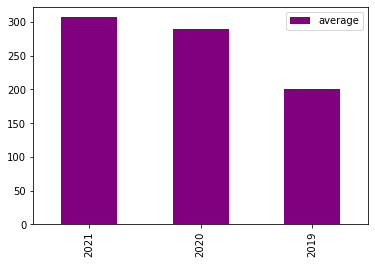

In [117]:
#Bar chart of the average Cao Points for the three years
plotdata = pd.DataFrame(
    {"average": [307.23, 289.17, 200.77]}, 
    index=["2021", "2020", "2019"])
# Plot a bar chart
plotdata.plot(kind="bar", color="purple")


In [118]:
allcourses['R1 Points 2021'].equals(allcourses['R1 Points 2020']) #Checking if any points remained the same

False

In [119]:
allcourses['R1 Points 2020'].equals(allcourses['R1 Points 2019'])#Checking if any points remained the same

False

### I wanted to check if any of the Cao points remained the same for any of the years 1 = True, 0 = False

In [120]:
allcourses['Same 21-20'] = np.where(allcourses['R1 Points 2021'] == allcourses['R1 Points 2020'] , '1', '0') #checking if there is a difference between the two years

In [121]:
allcourses['Same 20-19'] = np.where(allcourses['R1 Points 2020'] == allcourses['R1 Points 2019'] , '1', '0') #checking if there is a difference between the two years

In [122]:
allcourses['Same 21-20'].value_counts()[1]  #displaying how many courses that the Cao points never changed from 2021 to 2020

245

In [123]:
allcourses['Same 20-19'].value_counts()[1]  #displaying how many courses that the Cao points never changed from 2020 to 2019

186

In [124]:
allcourses.loc[allcourses['Same 21-20'] == '1'] #showing the courses that were the same in 2021 and 2020

,Course Title,R1 Points 2021,R1 Points 2020,R1 Points 2019,Same 21-20,Same 20-19
Course Code,,,,,,
AL600,Software Design,0,0,0,1,1
AL601,Computer Engineering,0,0,0,1,1
AL602,Mechanical Engineering,0,0,0,1,1
AL604,Civil Engineering,0,0,0,1,1
AL660,Culinary Arts,0,0,0,1,1
...,...,...,...,...,...,...
SG441,Environmental Science,0,0,297,1,0
SG446,Applied Archaeology,0,0,289,1,0
TL803,Music Technology,0,0,264,1,0


In [125]:
# From the above I noticed we had a few courses with 0 accross the 3 years so I wanted to show these: 
print("Courses that have 0 values across all the years: ",allcourses[(allcourses.sum(axis=1)==0)].index.tolist()) #displaying the 0 values for the three years

Courses that have 0 values across all the years:  ['AL600', 'AL601', 'AL602', 'AL604', 'AL660', 'AL661', 'AL663', 'CK114', 'CK115', 'DK771', 'DK885', 'DN301', 'DN411', 'DS603', 'GB001', 'GC250', 'GC460', 'MH103', 'MH116', 'MH802', 'MH803', 'TL743', 'TL889', 'TR564', 'TR666', 'TU772', 'WD003', 'WD172', 'WD174', 'WD182', 'CW048', 'CW087', 'TR587', 'GA876', 'GA892', 'GA973', 'GA983', 'SG335', 'SG349', 'TL742', 'TL842', 'DT533', 'ID003']


In [126]:
allcourses.loc['CK114'] #spot check

Course Title      Social Science (Youth and Community Work) - 3 ...
R1 Points 2021                                                    0
R1 Points 2020                                                    0
R1 Points 2019                                                    0
Same 21-20                                                        1
Same 20-19                                                        1
Name: CK114, dtype: object

In [127]:
allcourses.loc['TR587'] #spot check

Course Title      Middle Eastern,Jewish and Islamic Civilisation...
R1 Points 2021                                                    0
R1 Points 2020                                                    0
R1 Points 2019                                                    0
Same 21-20                                                        1
Same 20-19                                                        1
Name: TR587, dtype: object

In [128]:
allcourses.loc['MH103'] #spot check

Course Title      Music
R1 Points 2021        0
R1 Points 2020        0
R1 Points 2019        0
Same 21-20            1
Same 20-19            1
Name: MH103, dtype: object

In [129]:
allcourses[54:64] #small group to view at random

,Course Title,R1 Points 2021,R1 Points 2020,R1 Points 2019,Same 21-20,Same 20-19
Course Code,,,,,,
AL836,Nutrition and Health Science,346,334,352,0,0
AL837,Sports Science with Exercise Physiology,357,351,351,0,1
AL838,Biotechnology,324,307,302,0,0
AL839,Microbiology,325,325,322,1,0
AL840,Pharmaceutical Sciences,346,347,328,0,0
AL841,Athletic and Rehabilitation Therapy,477,430,423,0,0
AL842,Bioveterinary Science,338,313,310,0,0
AL843,Physical Activity and Health Science,306,306,310,1,0
AL850,Business,309,309,307,1,0


<AxesSubplot:xlabel='Course Code'>

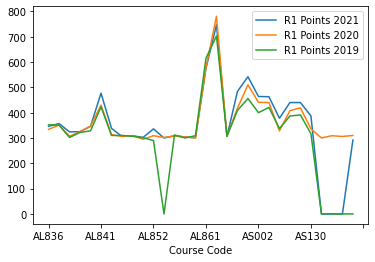

In [130]:
allcourses[54:84].plot() #line chart of the small set above

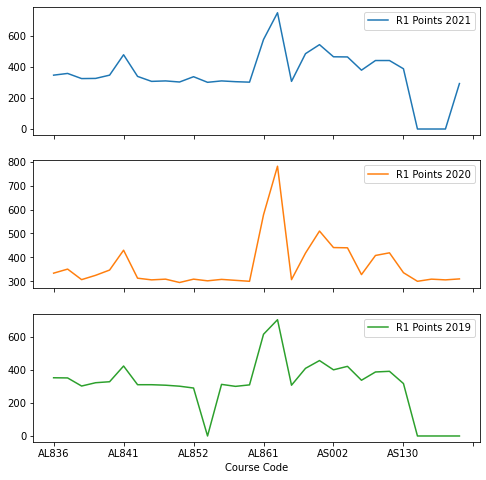

In [131]:
allcourses[54:84].plot(subplots=True, figsize=(8, 8)); #subplots of the small data set

<AxesSubplot:xlabel='Course Code'>

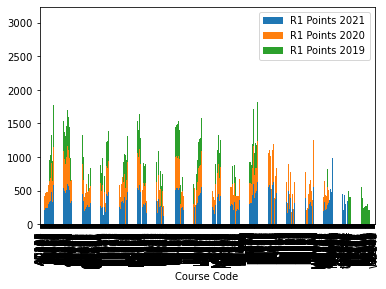

In [132]:
allcourses.plot.bar(stacked=True) #comparing all the columns 

<AxesSubplot:ylabel='Frequency'>

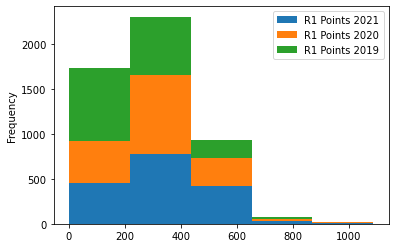

In [133]:
allcourses.plot.hist(stacked=True, bins=5) #Comparison histogram of the three years

<AxesSubplot:>

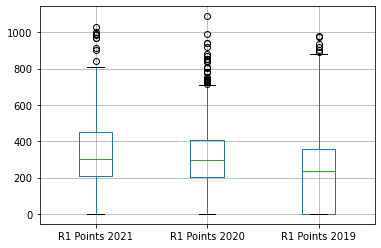

In [134]:
# Box plot of the cao points showing the outliers, max, min and median
allcourses.boxplot(column=['R1 Points 2021', 'R1 Points 2020', 'R1 Points 2019'])

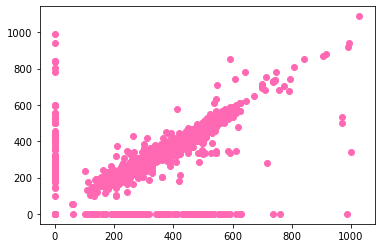

In [135]:
pltX = allcourses.loc[:, 'R1 Points 2021'] #calling all the values of R1 Points 2021
pltY =allcourses.loc[:, 'R1 Points 2020'] #creating the y values from the R1 Points 2020
plt.scatter(pltX, pltY, color = 'hotpink') #creating the scatter plot of the 2021 comparison to 2021 datapoints

<br>

## Cao Points for 2019 V 2020

- 178 courses went up in Cao points in 2020 compared to 2019 (24% up)
- 37 courses remained the same points in 2019 and 2020 (5% same)
- 542 courses went down in points for 2020 (72% down)
- The course with the largest degrease of points (-224) in 2020 from 2019 was Course Code: DL829 ~ Design for Stage and Screen (Costume Design)
- The course with the largest increase of points (+419) in 2020 from 2019 was Course Code: GA283 ~ Contemporary Art

***

In [136]:
#New df for getting the difference between the 2019 & 2020
allcourses1=pd.DataFrame(allcourses, columns=['R1 Points 2019', 'R1 Points 2020']) #bringing in the requested columns

In [137]:
allcourses1 = allcourses1[allcourses1.loc[:]!=0].dropna() #drops the rows where 0 was on both years

print("Given Dataframe :\n", allcourses1)

Given Dataframe :
              R1 Points 2019  R1 Points 2020
Course Code                                
AC120                 234.0           209.0
AC137                 252.0           252.0
AD215                 300.0           377.0
AL801                 304.0           303.0
AL802                 301.0           332.0
...                     ...             ...
WD195                 266.0           279.0
WD210                 271.0           279.0
WD211                 275.0           271.0
WD212                 274.0           270.0
WD230                 273.0           253.0

[757 rows x 2 columns]


In [138]:
allcourses1['Cao_diff_19-20'] = allcourses1['R1 Points 2019'] - allcourses1['R1 Points 2020'].astype(int) #creating the new column that shows the quantity difference between 2021 and 2020.
print("\nDifference of R1 Points 2019 and R1 Points 2020 :\n", allcourses1)


Difference of R1 Points 2019 and R1 Points 2020 :
              R1 Points 2019  R1 Points 2020  Cao_diff_19-20
Course Code                                                
AC120                 234.0           209.0            25.0
AC137                 252.0           252.0             0.0
AD215                 300.0           377.0           -77.0
AL801                 304.0           303.0             1.0
AL802                 301.0           332.0           -31.0
...                     ...             ...             ...
WD195                 266.0           279.0           -13.0
WD210                 271.0           279.0            -8.0
WD211                 275.0           271.0             4.0
WD212                 274.0           270.0             4.0
WD230                 273.0           253.0            20.0

[757 rows x 3 columns]


In [139]:
allcourses1.iloc[15:25] #checking a small data set for the amount of points that remained the same, went up and went down.

,R1 Points 2019,R1 Points 2020,Cao_diff_19-20
Course Code,,,
AL840,328.0,347.0,-19.0
AL841,423.0,430.0,-7.0
AL842,310.0,313.0,-3.0
AL843,310.0,306.0,4.0
AL850,307.0,309.0,-2.0
AL851,301.0,295.0,6.0
AL852,290.0,309.0,-19.0
AL855,312.0,308.0,4.0
AL857,300.0,304.0,-4.0


In [140]:
allcourses1[allcourses1 >0].count() #Shows that 178 courses went down in Cao points

R1 Points 2019    757
R1 Points 2020    757
Cao_diff_19-20    178
dtype: int64

In [141]:
allcourses1[allcourses1.iloc[:,2]> 0] #Showing the actually courses that went down in points for 2020

,R1 Points 2019,R1 Points 2020,Cao_diff_19-20
Course Code,,,
AC120,234.0,209.0,25.0
AL801,304.0,303.0,1.0
AL836,352.0,334.0,18.0
AL843,310.0,306.0,4.0
AL851,301.0,295.0,6.0
...,...,...,...
WD193,290.0,271.0,19.0
WD194,235.0,217.0,18.0
WD211,275.0,271.0,4.0


In [142]:
    allcourses1[allcourses1.iloc[:,2]== 0].count() #37 Courses remained the same

R1 Points 2019    37
R1 Points 2020    37
Cao_diff_19-20    37
dtype: int64

In [143]:
allcourses1[allcourses1.iloc[:,2]== 0] #List of Courses that remained the same

,R1 Points 2019,R1 Points 2020,Cao_diff_19-20
Course Code,,,
AC137,252.0,252.0,0.0
AL832,387.0,387.0,0.0
AL837,351.0,351.0,0.0
AL864,307.0,307.0,0.0
CK101,300.0,300.0,0.0
CR400,316.0,316.0,0.0
CW028,252.0,252.0,0.0
CW038,700.0,700.0,0.0
CW108,261.0,261.0,0.0


In [144]:
allcourses1[allcourses1.iloc[:,2]< 0].count() #Number of courses went up in 2020 was 542

R1 Points 2019    542
R1 Points 2020    542
Cao_diff_19-20    542
dtype: int64

In [145]:
allcourses1[allcourses1.iloc[:,2]< 0] #Showing the 542 courses that went up in 2020

,R1 Points 2019,R1 Points 2020,Cao_diff_19-20
Course Code,,,
AD215,300.0,377.0,-77.0
AL802,301.0,332.0,-31.0
AL803,309.0,337.0,-28.0
AL805,329.0,333.0,-4.0
AL810,307.0,319.0,-12.0
...,...,...,...
WD144,283.0,284.0,-1.0
WD163,390.0,434.0,-44.0
WD187,271.0,272.0,-1.0


In [146]:
allcourses1.max().sort_values(ascending=False) #sort by largest values

R1 Points 2020    1088.0
R1 Points 2019     972.0
Cao_diff_19-20     224.0
dtype: float64

In [147]:
allcourses1.sort_values(by='Cao_diff_19-20', ascending=False) #Sorting the df by the largest degrease of points 

,R1 Points 2019,R1 Points 2020,Cao_diff_19-20
Course Code,,,
DL829,817.0,593.0,224.0
DL828,691.0,506.0,185.0
DL831,893.0,781.0,112.0
LC613,346.0,242.0,104.0
DB501,326.0,227.0,99.0
...,...,...,...
SG244,355.0,505.0,-150.0
GC300,251.0,429.0,-178.0
CR121,633.0,868.0,-235.0


In [148]:
allcourses.loc[ 'DL829'] #Capturing the course that decreased the most in 2020 

Course Title      Design for Stage and Screen (Costume Design)
R1 Points 2021                                               0
R1 Points 2020                                             593
R1 Points 2019                                             817
Same 21-20                                                   0
Same 20-19                                                   0
Name: DL829, dtype: object

In [149]:
allcourses.loc['GA283'] #Capturing the course that increased the most in 2020 

Course Title      Contemporary Art
R1 Points 2021                 790
R1 Points 2020                 679
R1 Points 2019                 260
Same 21-20                       0
Same 20-19                       0
Name: GA283, dtype: object

<AxesSubplot:ylabel='Counts'>

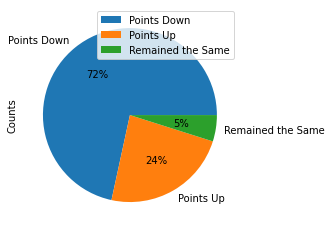

In [150]:
### Pie Chart of the comparison of points between 2019 and 2020

allcourses2 = pd.DataFrame({'Status': ['Remained the Same', 'Points Up', 'Points Down'],
                            'Counts': [37, 178, 542]})

allcourses2.groupby(['Status']).sum().plot(kind='pie', y='Counts', autopct='%1.0f%%')

In [151]:
#Taking a small data set of where the points decreased so I can look at them in more detail
df1 = allcourses1[allcourses1.iloc[:,2]> 0] 
df2 = df1[10:20]

In [152]:
df2 #Calling the small dataframe and plotting it below

,R1 Points 2019,R1 Points 2020,Cao_diff_19-20
Course Code,,,
CK105,397.0,368.0,29.0
CK108,429.0,401.0,28.0
CK109,347.0,318.0,29.0
CK110,456.0,452.0,4.0
CK122,355.0,337.0,18.0
CK207,408.0,388.0,20.0
CK208,431.0,402.0,29.0
CK209,509.0,484.0,25.0
CK211,398.0,397.0,1.0


<AxesSubplot:xlabel='Course Code'>

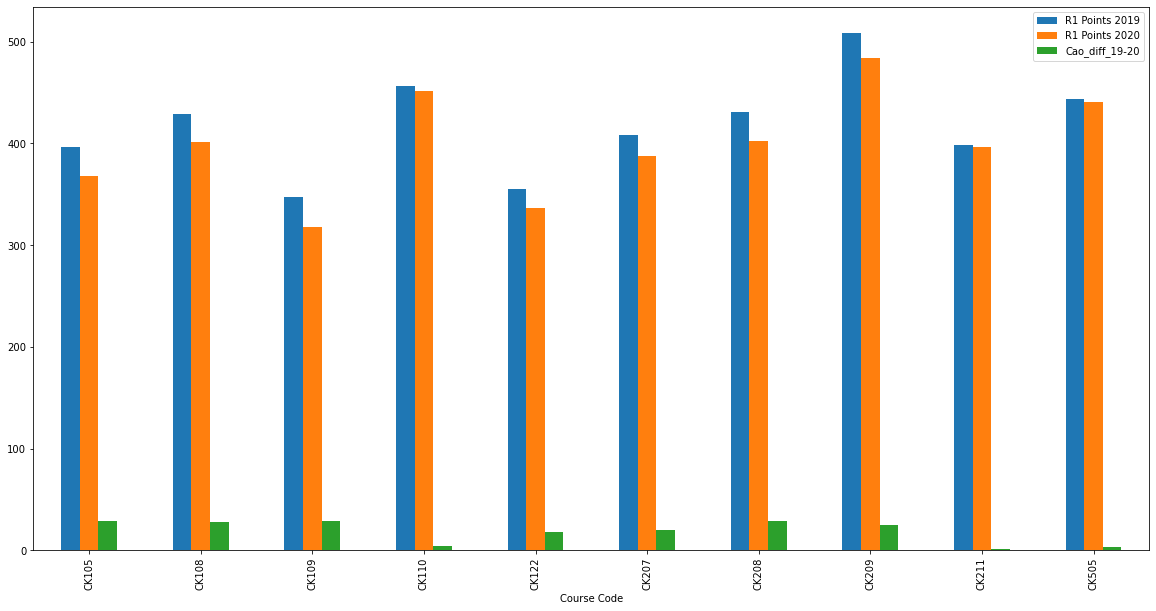

In [153]:
df2.plot(kind='bar', figsize=(20,10)) #creating a bar chart of the small dataset 

<br>

## Cao Points for 2020 V 2021

- 909 courses went up in Cao points in 2021 compared to 2020 (71% up)
- 66 courses remained the same points in 2019 and 2020 (5% same)
- 300 courses went down in points for 2020 (24% down)
- The course with the largest degrease of points (-264) in 2021 from 2020 was Course Code: DL826 ~ Visual Communication Design
- The course with the largest increase of points (+657) in 2021 from 2019 was Course Code: TR565 ~ Middle Eastern,Jewish and Islamic Civilisation

***

In [154]:
#New df for getting the difference between the 2019 & 2020
allcourses3=pd.DataFrame(allcourses, columns=['R1 Points 2020', 'R1 Points 2021']) #bringing in the requested columns

In [155]:
allcourses3= allcourses3[allcourses3.loc[:]!=0].dropna() #drops the rows where 0 was on both years

print("Given Dataframe :\n", allcourses3)

Given Dataframe :
              R1 Points 2020  R1 Points 2021
Course Code                                
AC120                 209.0           294.0
AC137                 252.0           271.0
AD215                 377.0           337.0
AL630                 295.0           308.0
AL631                 300.0           311.0
...                     ...             ...
WD208                 188.0           317.0
WD210                 279.0           260.0
WD211                 271.0           270.0
WD212                 270.0           262.0
WD230                 253.0           230.0

[1275 rows x 2 columns]


In [156]:
allcourses3['Cao_diff_20-21'] = allcourses3['R1 Points 2020'] - allcourses3['R1 Points 2021'].astype(int) #creating the new column that shows the quantity difference between 2020 and 2021.
print("\nDifference of R1 Points 2020 and R1 Points 2021 :\n", allcourses3)


Difference of R1 Points 2020 and R1 Points 2021 :
              R1 Points 2020  R1 Points 2021  Cao_diff_20-21
Course Code                                                
AC120                 209.0           294.0           -85.0
AC137                 252.0           271.0           -19.0
AD215                 377.0           337.0            40.0
AL630                 295.0           308.0           -13.0
AL631                 300.0           311.0           -11.0
...                     ...             ...             ...
WD208                 188.0           317.0          -129.0
WD210                 279.0           260.0            19.0
WD211                 271.0           270.0             1.0
WD212                 270.0           262.0             8.0
WD230                 253.0           230.0            23.0

[1275 rows x 3 columns]


In [157]:
allcourses3.iloc[5:10] #checking a small data set for the amount of points that remained the same, went up and went down.

,R1 Points 2020,R1 Points 2021,Cao_diff_20-21
Course Code,,,
AL632,234.0,297.0,-63.0
AL701,216.0,207.0,9.0
AL702,214.0,220.0,-6.0
AL703,216.0,211.0,5.0
AL704,204.0,210.0,-6.0


In [158]:
allcourses3[allcourses3 >0].count() #Shows that 300 courses went down in Cao points

R1 Points 2020    1275
R1 Points 2021    1275
Cao_diff_20-21     300
dtype: int64

In [159]:
allcourses3[allcourses3.iloc[:,2]> 0] #Showing the actually courses that went down in points for 2021

,R1 Points 2020,R1 Points 2021,Cao_diff_20-21
Course Code,,,
AD215,377.0,337.0,40.0
AL701,216.0,207.0,9.0
AL703,216.0,211.0,5.0
AL712,252.0,247.0,5.0
AL752,225.0,223.0,2.0
...,...,...,...
WD207,198.0,172.0,26.0
WD210,279.0,260.0,19.0
WD211,271.0,270.0,1.0


In [160]:
allcourses3[allcourses3.iloc[:,2]== 0].count() #66 Courses remained the same

R1 Points 2020    66
R1 Points 2021    66
Cao_diff_20-21    66
dtype: int64

In [161]:
allcourses3[allcourses3.iloc[:,2]== 0] #List of Courses that remained the same

,R1 Points 2020,R1 Points 2021,Cao_diff_20-21
Course Code,,,
AL734,244.0,244.0,0.0
AL751,241.0,241.0,0.0
AL764,260.0,260.0,0.0
AL839,325.0,325.0,0.0
AL843,306.0,306.0,0.0
...,...,...,...
TU992,251.0,251.0,0.0
WD084,308.0,308.0,0.0
WD140,280.0,280.0,0.0


In [162]:
allcourses3[allcourses3.iloc[:,2]< 0].count() #Number of courses went up in 2021 was 909

R1 Points 2020    909
R1 Points 2021    909
Cao_diff_20-21    909
dtype: int64

In [163]:
allcourses3[allcourses3.iloc[:,2]< 0] #Showing the 909 courses that went up in 2021

,R1 Points 2020,R1 Points 2021,Cao_diff_20-21
Course Code,,,
AC120,209.0,294.0,-85.0
AC137,252.0,271.0,-19.0
AL630,295.0,308.0,-13.0
AL631,300.0,311.0,-11.0
AL632,234.0,297.0,-63.0
...,...,...,...
WD192,270.0,271.0,-1.0
WD193,271.0,279.0,-8.0
WD194,217.0,237.0,-20.0


In [164]:
allcourses3.max().sort_values(ascending=False) #sort by largest values

R1 Points 2020    1088.0
R1 Points 2021    1028.0
Cao_diff_20-21     264.0
dtype: float64

In [165]:
allcourses3.min().sort_values(ascending=False) #sort by smallest values

R1 Points 2021     57.0
R1 Points 2020     55.0
Cao_diff_20-21   -657.0
dtype: float64

In [166]:
allcourses3.sort_values(by='Cao_diff_20-21', ascending=False) #Sorting the df by the largest degrease of points 

,R1 Points 2020,R1 Points 2021,Cao_diff_20-21
Course Code,,,
DL826,855.0,591.0,264.0
TU880,578.0,412.0,166.0
MI001,375.0,209.0,166.0
GC300,429.0,264.0,165.0
TU974,709.0,549.0,160.0
...,...,...,...
TR231,349.0,613.0,-264.0
TR198,534.0,968.0,-434.0
TL801,281.0,718.0,-437.0


In [167]:
allcourses.loc['DL826'] #Capturing the course that decreased the most in 2021

Course Title      Visual Communication Design
R1 Points 2021                            591
R1 Points 2020                            855
R1 Points 2019                            736
Same 21-20                                  0
Same 20-19                                  0
Name: DL826, dtype: object

In [168]:
allcourses.loc['TR565'] #Capturing the course that decreased the most in 2021

Course Title      Middle Eastern,Jewish and Islamic Civilisation...
R1 Points 2021                                                  999
R1 Points 2020                                                  342
R1 Points 2019                                                    0
Same 21-20                                                        0
Same 20-19                                                        0
Name: TR565, dtype: object

<AxesSubplot:ylabel='Counts'>

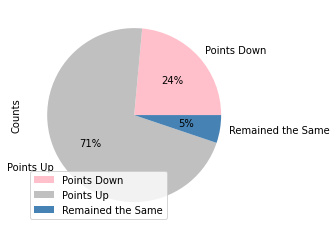

In [169]:
### Pie Chart of the comparison of points between 2020 and 2021.

colors = ['pink', 'silver', 'steelblue']

allcourses4 = pd.DataFrame({'Status': ['Remained the Same', 'Points Up', 'Points Down'],
                            'Counts': [66, 909, 300]})

allcourses4.groupby(['Status']).sum().plot(kind='pie', y='Counts', autopct='%1.0f%%', colors =colors)

In [170]:
#Creating a small dataset of the Cao points that went up in 2021
df3 = allcourses3[allcourses3.iloc[:,2]< 0] #setting up my new data frame
df3 = df3[43:53] #reducing to size
df3 = df3[['R1 Points 2020', 'R1 Points 2021']] #cleaning up the data again
df3['Cao_diff20-21'] = df3['R1 Points 2021'] - df3['R1 Points 2020']

In [171]:
df3

,R1 Points 2020,R1 Points 2021,Cao_diff20-21
Course Code,,,
CK108,401.0,440.0,39.0
CK109,318.0,367.0,49.0
CK110,452.0,488.0,36.0
CK112,330.0,371.0,41.0
CK113,423.0,464.0,41.0
CK118,336.0,347.0,11.0
CK120,533.0,544.0,11.0
CK121,466.0,499.0,33.0
CK122,337.0,399.0,62.0


<AxesSubplot:ylabel='Course Code'>

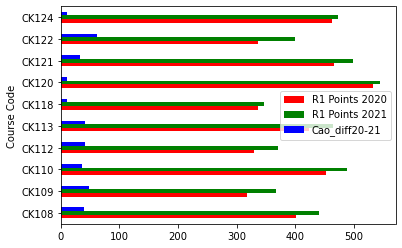

In [172]:
df3.plot.barh(color={"R1 Points 2020": "red", "R1 Points 2021": "green", "Cao_diff20-21": "blue"}) #calling a horizontal barchart of our small data

### Other graphs

***

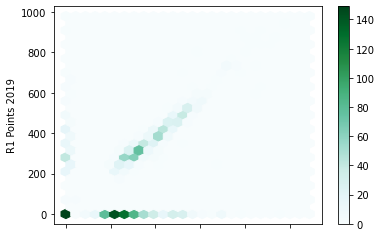

In [173]:
allcourses.plot.hexbin(x="R1 Points 2020", y="R1 Points 2019", reduce_C_function=np.max, gridsize=25);

array([[<AxesSubplot:xlabel='R1 Points 2021', ylabel='R1 Points 2021'>,
        <AxesSubplot:xlabel='R1 Points 2020', ylabel='R1 Points 2021'>,
        <AxesSubplot:xlabel='R1 Points 2019', ylabel='R1 Points 2021'>],
       [<AxesSubplot:xlabel='R1 Points 2021', ylabel='R1 Points 2020'>,
        <AxesSubplot:xlabel='R1 Points 2020', ylabel='R1 Points 2020'>,
        <AxesSubplot:xlabel='R1 Points 2019', ylabel='R1 Points 2020'>],
       [<AxesSubplot:xlabel='R1 Points 2021', ylabel='R1 Points 2019'>,
        <AxesSubplot:xlabel='R1 Points 2020', ylabel='R1 Points 2019'>,
        <AxesSubplot:xlabel='R1 Points 2019', ylabel='R1 Points 2019'>]],
      dtype=object)

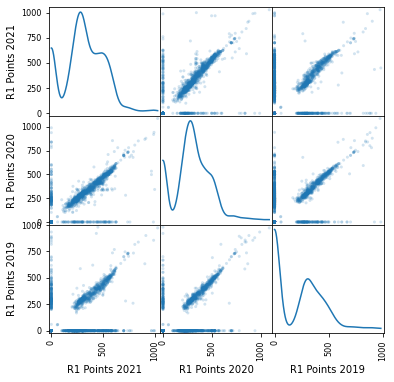

In [174]:
from pandas.plotting import scatter_matrix
scatter_matrix(allcourses, alpha=0.2, figsize=(6, 6), diagonal="kde")

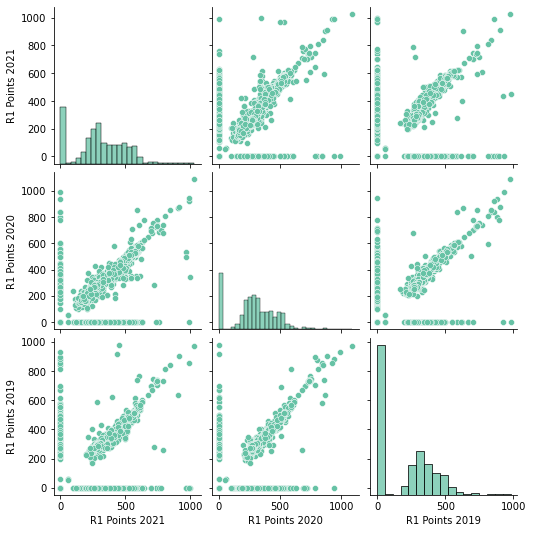

In [175]:
import seaborn as sns 
sns.set_palette("Set2")
sns.pairplot(allcourses,markers=["o", "s", "D"])